In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [116]:
data = pd.read_csv("ICOmod.csv",encoding='latin1')

In [117]:
data
data.columns

Index(['Crop year', 'Unnamed: 1', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20'],
      dtype='object')

In [118]:
data.drop(['Unnamed: 1'], axis=1, inplace = True)
data

,Crop year,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,...,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20
0,April group,"10,408","10,708","11,212","11,453","11,506","12,334","13,236","13,805","14,540",...,"23,439","24,346","25,171","25,263","25,659","25,948","26,757","27,636","27,900","27,701"
1,Angola,20,30,35,20,25,10,20,40,30,...,30,30,30,30,30,30,30,30,30,30
2,Bolivia (Plurinational State of),25,27,28,29,30,31,32,33,33,...,48,49,51,52,54,55,57,59,60,61
3,Brazil,"8,200","8,500","8,900","9,100","9,300","10,100","11,000","11,500","12,200",...,"19,132","19,720","20,330","20,085","20,333","20,508","21,225","21,997","22,200","22,000"
4,Burundi,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,Ecuador,350,350,350,350,350,350,300,300,300,...,150,150,150,155,155,155,155,155,155,149
6,Indonesia,"1,242","1,280","1,319","1,359","1,400","1,443","1,486","1,532","1,578",...,"3,333","3,667","3,900","4,250","4,417","4,550","4,650","4,750","4,800","4,806"
7,Madagascar,350,300,350,360,167,167,167,167,167,...,467,450,430,410,390,370,360,365,375,375
8,Malawi,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
9,Papua New Guinea,3,3,3,2,2,2,2,2,1,...,1,1,2,2,2,2,2,2,2,2


In [119]:
dataN = pd.melt(data, id_vars='Crop year', value_vars=['2015/16', '2016/17', '2017/18', '2018/19','2019/20'],var_name='year', value_name='volume')

In [120]:
dataN.drop(dataN.index[[0,15,58,59,298]], inplace = True)
dataN = dataN.rename(columns = {'Crop year' : 'Country'})

In [122]:
dataN.dropna()

,Country,year,volume
1,Angola,2015/16,30
2,Bolivia (Plurinational State of),2015/16,55
3,Brazil,2015/16,20508
4,Burundi,2015/16,2
5,Ecuador,2015/16,155
...,...,...,...
294,Uganda,2019/20,254
295,Venezuela,2019/20,1275
296,Viet Nam,2019/20,2650
297,Yemen,2019/20,64


In [124]:
dataN['volume'] = dataN["volume"].str.replace(',','')
dataN["volume"] = dataN["volume"].astype(str).astype(float)

In [125]:
dataS = dataN.sort_values(['year','volume'],ascending=False).groupby('Country').head(5)
dataS.dtypes

Country     object
year        object
volume     float64
dtype: object

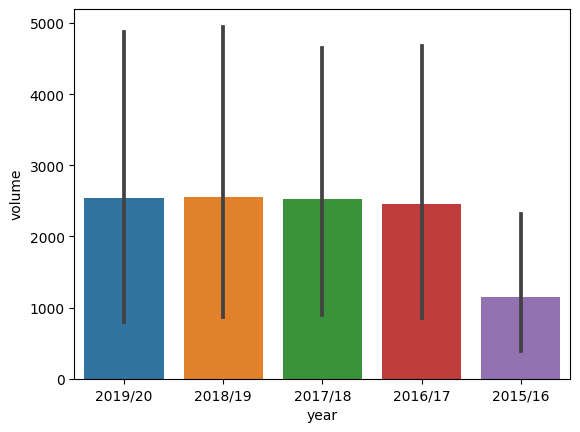

In [129]:
sns.barplot(
    x='year',
    y='volume',
    data= dataN.sort_values(['year','volume'],ascending=False).groupby('Country').head(5)
)
plt.show()